Es 3

In [38]:
#trovo il valore analitico di call e put

import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


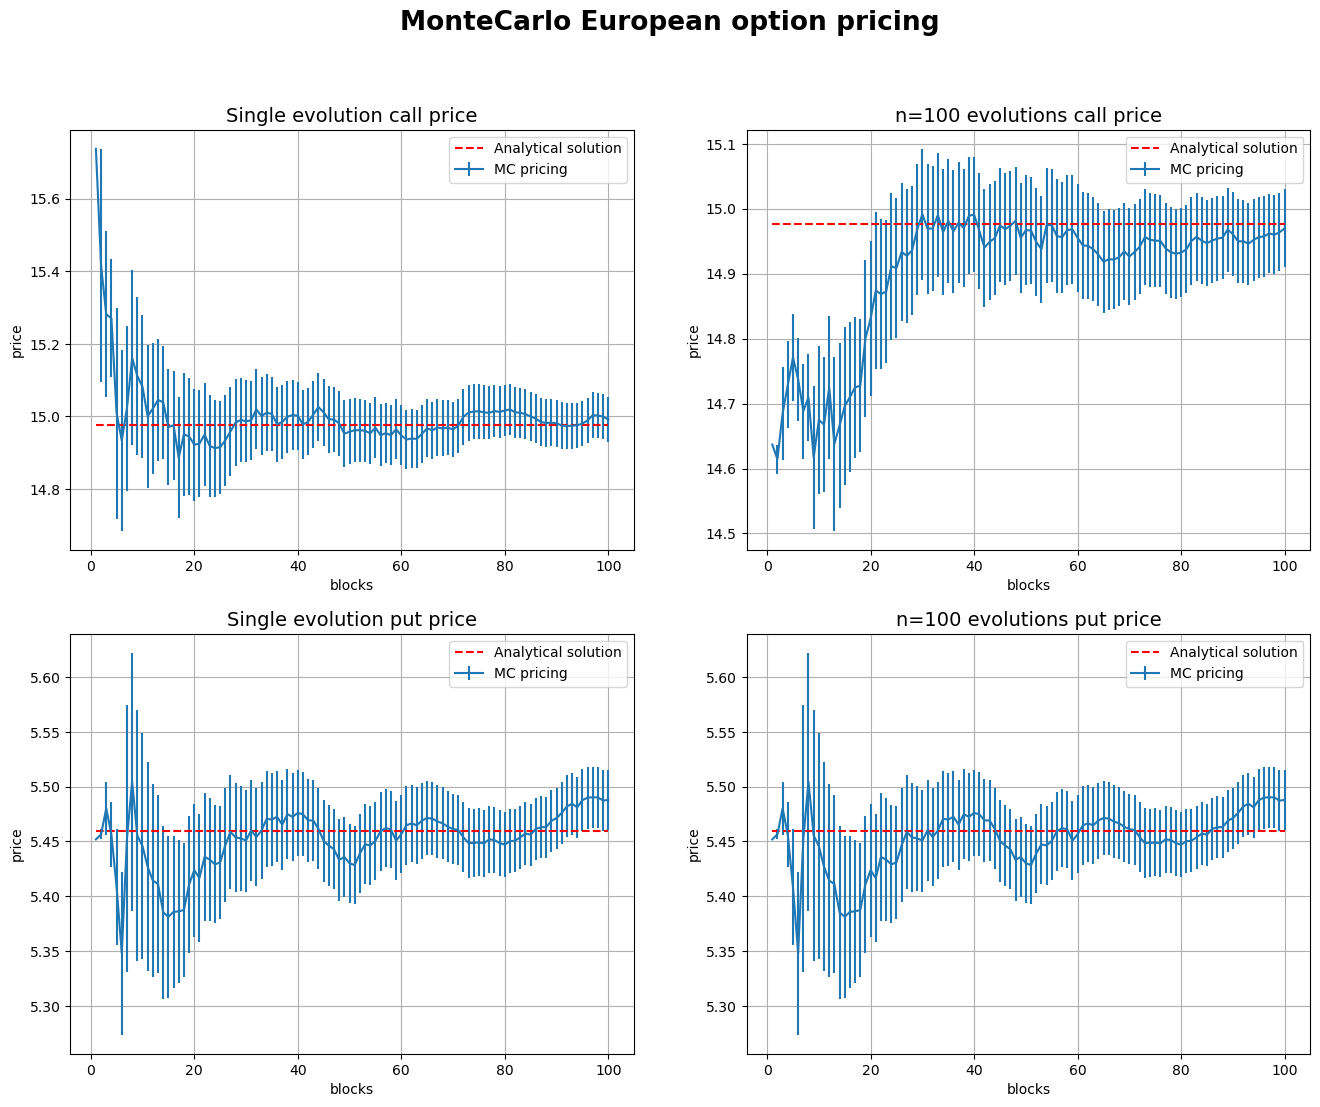

---final results---
single evolution
call: 14.9914  +-  0.0615667
put: 5.48786  +-  0.0272551
n=100 evolutions
call: 14.9698  +-  0.0599268
put: 5.48786  +-  0.0272551


In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x1, call1, errcall1=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es3/call1step.txt", unpack=True)

x2, put1, errput1=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es3/put1step.txt", unpack=True)

x3, callM, errcallM=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es3/callmultistep.txt", unpack=True)

x4, putM, errputM=np.loadtxt("/home/cecilia/Scrivania/LabSN/Esercitazioni/Es3/putmultistep.txt", unpack=True)

call =  14.975790778311286
put = 5.4595325819072364



Cvec = call*np.ones(call1.size)
Pvec = put*np.ones(put1.size)

#plotting
plt.figure(figsize=(16,12))
plt.suptitle('MonteCarlo European option pricing',fontweight='bold',fontsize=19)

plt.subplot(221)
plt.errorbar(x1,call1,errcall1,label='MC pricing')
plt.title('Single evolution call price',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('price')
plt.grid(True)
plt.plot(x1,Cvec,'r--',label='Analytical solution')
plt.legend()

plt.subplot(222)
plt.errorbar(x3,callM,errcallM,label='MC pricing')
plt.title('n=100 evolutions call price',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('price')
plt.grid(True)
plt.plot(x,Cvec,'r--',label='Analytical solution')
plt.legend()

plt.subplot(223)
plt.errorbar(x2,put1,errput1,label='MC pricing')
plt.title('Single evolution put price',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('price')
plt.grid(True)
plt.plot(x,Pvec,'r--',label='Analytical solution')
plt.legend()

plt.subplot(224)
plt.errorbar(x4,putM,errputM,label='MC pricing')
plt.title('n=100 evolutions put price',fontsize=14)
plt.xlabel('blocks')
plt.ylabel('price')
plt.grid(True)
plt.plot(x,Pvec,'r--',label='Analytical solution')
plt.legend()

plt.show()

print('---final results---')
print('single evolution')
print('call:',call1[call1.size-1],' +- ',errcall1[errcall1.size-1])
print('put:',put1[put1.size-1],' +- ',errput1[errput1.size-1])
print('n=100 evolutions')
print('call:',callM[callM.size-1],' +- ',errcallM[errcallM.size-1])
print('put:',putM[putM.size-1],' +- ',errputM[errputM.size-1])